# K Nearest Neighbors Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/combined_data/combined_data.csv")
df.head()

,AvgTemp,MaxTemp,MinTemp,SeaLevelPressure,AvgHumidity,TotalRainfallSnowmelt,AvgVisibility,AvgWindSpeed,MaxWindSpeed,RainDrizzle,Snow,ThunderStorm,Fog,PM 2.5
0,4.3,10.0,1.7,1023.1,94.0,0.00,8.0,13.0,22.2,0.0,0.0,0.0,0.0,40.080000
1,8.8,14.4,1.7,1021.4,89.0,0.00,10.3,8.9,20.6,0.0,0.0,0.0,0.0,42.400000
2,14.3,17.2,5.0,1016.6,84.0,0.76,12.4,15.2,24.1,0.0,0.0,0.0,0.0,31.250000
3,5.8,9.4,-2.2,1023.8,70.0,0.00,15.6,17.0,38.9,0.0,0.0,0.0,0.0,20.227273
4,2.1,4.0,-1.0,1025.9,49.0,0.00,16.1,20.9,29.4,0.0,0.0,0.0,0.0,17.100000


In [3]:
# split into dependent and independent features
X = df.iloc[:,:-1] # independent features
y = df.iloc[:,-1]  # dependent feature

#### Train test split

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [5]:
from sklearn.neighbors import KNeighborsRegressor

In [6]:
knn=KNeighborsRegressor(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=1)

In [7]:
print(f"Coefficient of determination R^2 for train set: {knn.score(X_train,y_train)}")

Coefficient of determination R^2 for train set: 1.0


In [8]:
print(f"Coefficient of determination R^2 for test set: {knn.score(X_test,y_test)}")

Coefficient of determination R^2 for test set: -0.43685093222393845


In [9]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, y, cv=5)

In [10]:
score.mean()

-1.8148430089429581

In [11]:
prediction = knn.predict(X_test)

c:\users\tigju\anaconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


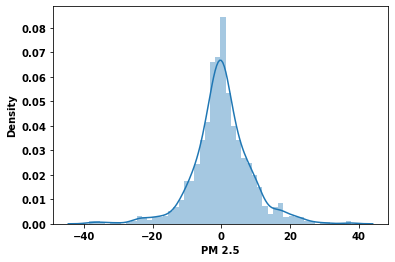

In [12]:
sns.distplot(y_test-prediction)

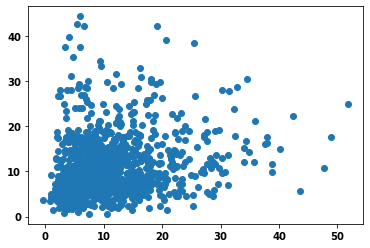

In [13]:
plt.scatter(y_test, prediction)

In [16]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 5.901701229466961
MSE: 71.2719975811933
RMSE: 8.442274431762646


#### Hyperparameter tuning

In [14]:
accuracy_rate = []

# Will take some time
for i in range(1,40):
    knn = KNeighborsRegressor(n_neighbors=i)
    score=cross_val_score(knn,X,y,cv=10,scoring="neg_mean_squared_error")
    accuracy_rate.append(score.mean())

Text(0, 0.5, 'Accuracy Rate')

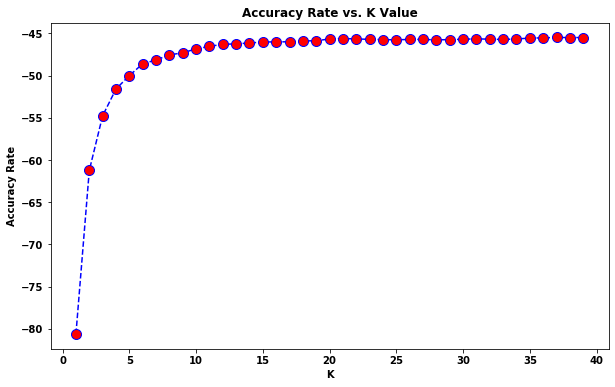

In [15]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
#plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
 #        markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

In [18]:
knn3 = KNeighborsRegressor(n_neighbors=3)

knn3.fit(X_train,y_train)
predictions = knn3.predict(X_test)

c:\users\tigju\anaconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


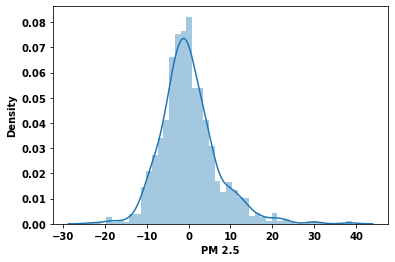

In [19]:
sns.distplot(y_test-predictions)

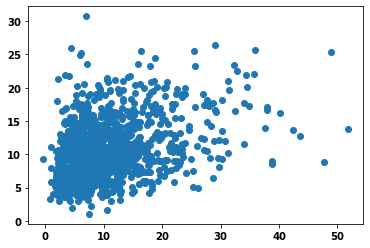

In [20]:
plt.scatter(y_test, predictions)

In [21]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 4.984388732750118
MSE: 47.29020585388942
RMSE: 6.8767874660985


In [34]:
knn38 = KNeighborsRegressor(n_neighbors=38)

knn38.fit(X_train,y_train)
predictions = knn38.predict(X_test)

c:\users\tigju\anaconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


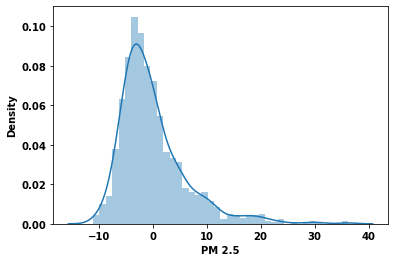

In [35]:
sns.distplot(y_test-predictions)

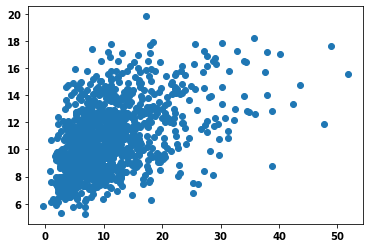

In [36]:
plt.scatter(y_test, predictions)

In [37]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 4.538362399752421
MSE: 39.34603414753025
RMSE: 6.272641720003642


#### not using this model because I got beter results with random forest and xgboost 